# Libraries

In [1]:
library(ggplot2)
library(reshape2)
library(ComplexHeatmap)
library(circlize)

Lade nötiges Paket: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enh

# Options

In [2]:
options(stringsAsFactors = F)

# Read in data

In [3]:
# list of files
files <- list.files(getwd())
print(files)

 [1] "ATAC_1_QC_normalization_DOpeaks.ipynb" 
 [2] "ATAC_2_FAS_RUNX3_ETS1_openness.ipynb"  
 [3] "ATAC_ETS1_Ly1_barplot.pdf"             
 [4] "ATAC_ETS1_Ly1_barplot.svg"             
 [5] "ATAC_ETS1_Ly8_barplot.pdf"             
 [6] "ATAC_ETS1_Ly8_barplot.svg"             
 [7] "ATAC_ETS1_RUNX3_Ly1.pdf"               
 [8] "ATAC_ETS1_RUNX3_Ly1.svg"               
 [9] "ATAC_ETS1_RUNX3_Ly8.pdf"               
[10] "ATAC_ETS1_RUNX3_Ly8.svg"               
[11] "ATAC_FAS_Ly8.pdf"                      
[12] "ATAC_FAS_Ly8.svg"                      
[13] "ATAC_RUNX3_Ly1_barplot.pdf"            
[14] "ATAC_RUNX3_Ly1_barplot.svg"            
[15] "ATAC_RUNX3_Ly8_barplot.pdf"            
[16] "ATAC_RUNX3_Ly8_barplot.svg"            
[17] "TableS1_diffPeaks_onPromoters.txt"     
[18] "TableS2_peak_labels_FAS_RUNX3_ETS1.txt"
[19] "anno_peaks_Ly1.txt"                    
[20] "anno_peaks_Ly8.txt"                    
[21] "anno_peaks_raw_Ly1.txt"                
[22] "anno_peaks_raw_Ly8.txt"     

In [4]:
cell_lines <- c("Ly1"
               ,"Ly8")

In [5]:
# read in counts
counts <- lapply(cell_lines
                   ,function(cell_line){
                       my_file <- files[grepl("counts_norm"
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = my_file
                               ,sep = "\t"
                               ,header = TRUE)
                   })

names(counts) <- cell_lines

print(str(counts))
print(head(rownames(counts[[1]])))

[1] "counts_norm_Ly1.txt"
[1] "counts_norm_Ly8.txt"
List of 2
 $ Ly1:'data.frame':	51339 obs. of  8 variables:
  ..$ Ly1_KO_E8  : num [1:51339] 18.6 1889.7 24 71 17.5 ...
  ..$ Ly1_KO_G1  : num [1:51339] 6.93 1545.03 27.7 94.88 10.39 ...
  ..$ Ly1_KO_H3  : num [1:51339] 12.8 2269.5 13.8 82.6 23.9 ...
  ..$ Ly1_cas9_N1: num [1:51339] 32.9 1576.3 11.5 67.5 23 ...
  ..$ Ly1_cas9_N7: num [1:51339] 61.1 1958.6 18.6 67.3 42.4 ...
  ..$ Ly1_cas9_N9: num [1:51339] 12 1144.5 19.4 100.4 32.5 ...
  ..$ Ly1_het_F10: num [1:51339] 32.3 2373.8 16.9 90.7 10.8 ...
  ..$ Ly1_het_F9 : num [1:51339] 6.62 1592.57 30.63 75.32 38.08 ...
 $ Ly8:'data.frame':	56996 obs. of  7 variables:
  ..$ Ly8_KO_G6   : num [1:56996] 4.65 3150.03 60.43 7.75 193.68 ...
  ..$ Ly8_cas9_N11: num [1:56996] 16.8 4260.6 50.5 16.8 182.3 ...
  ..$ Ly8_cas9_N3 : num [1:56996] 6.2 3604.9 44.4 18.6 140.6 ...
  ..$ Ly8_cas9_N6 : num [1:56996] 8.23 2085.77 49.39 23.05 149.81 ...
  ..$ Ly8_het_A9  : num [1:56996] 0 2574.7 56.1 12 176.5 .

In [6]:
# read in anno
anno <- lapply(cell_lines
                   ,function(cell_line){
                       my_file <- paste0("anno_peaks_"
                                        ,cell_line
                                        ,".txt")
                       
                       read.table(file = my_file
                               ,sep = "\t"
                               ,header = TRUE)
                   })

names(anno) <- cell_lines

print(str(anno))
print(head(rownames(anno[[1]])))

List of 2
 $ Ly1:'data.frame':	51339 obs. of  45 variables:
  ..$ peakID              : chr [1:51339] "1_181400_181555" "1_629896_629990" "1_804858_805040" "1_827273_827761" ...
  ..$ Chr                 : chr [1:51339] "1" "1" "1" "1" ...
  ..$ Start               : int [1:51339] 181400 629896 804858 827273 865730 869766 915579 919766 920550 921144 ...
  ..$ End                 : int [1:51339] 181555 629990 805040 827761 865924 870035 915747 919853 920834 921348 ...
  ..$ mean_count          : num [1:51339] 21.2 1844.8 23 90.5 27.8 ...
  ..$ threshold_mean_count: int [1:51339] 20 20 20 20 20 20 20 20 20 20 ...
  ..$ filter_mean_count   : logi [1:51339] TRUE TRUE TRUE TRUE TRUE TRUE ...
  ..$ threshold_count     : int [1:51339] 20 20 20 20 20 20 20 20 20 20 ...
  ..$ filter_count        : logi [1:51339] TRUE TRUE TRUE TRUE TRUE TRUE ...
  ..$ annoPackage         : chr [1:51339] "ChIPseeker.v1.8.6" "ChIPseeker.v1.8.6" "ChIPseeker.v1.8.6" "ChIPseeker.v1.8.6" ...
  ..$ TxDb               

[1] "1_181400_181555" "1_629896_629990" "1_804858_805040" "1_827273_827761"
[5] "1_865730_865924" "1_869766_870035"


# Variables

In [7]:
my_blue <- rgb(154
               ,196
               ,236
               ,maxColorValue = 255)
my_yellow <- rgb(233
               ,198
               ,29
               ,maxColorValue = 255)
my_red <- rgb(194,87,87,maxColorValue = 255)
my_width <- 4

# Plots

In [8]:
# define peak IDs
peaks_FAS_RUNX3_ETS1 <- unlist(c({peaks <- unique(c(rownames(counts[["Ly1"]])[anno[["Ly1"]]$SYMBOL %in% "FAS"]
                                        ,rownames(counts[["Ly8"]])[anno[["Ly8"]]$SYMBOL %in% "FAS"]
                                       ))
                      labels <- paste("peak"
                                     ,1:length(peaks))
                      names(labels) <- peaks
                      labels
                     }
                     ,{peaks <- unique(c(rownames(counts[["Ly1"]])[anno[["Ly1"]]$SYMBOL %in% "RUNX3"]
                                        ,rownames(counts[["Ly8"]])[anno[["Ly8"]]$SYMBOL %in% "RUNX3"]
                                       ))
                      labels <- paste("peak"
                                     ,1:length(peaks))
                      names(labels) <- peaks
                      labels
                     }
                     ,{peaks <- unique(c(rownames(counts[["Ly1"]])[anno[["Ly1"]]$SYMBOL %in% "ETS1"]
                                        ,rownames(counts[["Ly8"]])[anno[["Ly8"]]$SYMBOL %in% "ETS1"]
                                       ))
                      labels <- paste("peak"
                                     ,1:length(peaks))
                      names(labels) <- peaks
                      labels
                      }
                    )
              )
peaks_FAS_RUNX3_ETS1 <- data.frame(peak_ID = names(peaks_FAS_RUNX3_ETS1)
                                      ,label = peaks_FAS_RUNX3_ETS1)
peaks_FAS_RUNX3_ETS1$gene_symbol <- sapply(rownames(peaks_FAS_RUNX3_ETS1)
                                          ,function(id){
                                              ifelse(grepl("10_",id)
                                                    ,"FAS"
                                                    ,ifelse(grepl("1_2"
                                                                 ,id)
                                                           ,"RUNX3"
                                                           ,"ETS1")
                                                     )
                                          })
peaks_FAS_RUNX3_ETS1$chromosome <- sub("[_].*"
                                      ,""
                                      ,rownames(peaks_FAS_RUNX3_ETS1))
peaks_FAS_RUNX3_ETS1$start <- gsub(".*[_](.+)[_].*", "\\1"
                     ,rownames(peaks_FAS_RUNX3_ETS1)) 
peaks_FAS_RUNX3_ETS1$end <- sub(".*[_]"
                               ,""
                               ,rownames(peaks_FAS_RUNX3_ETS1))
peaks_FAS_RUNX3_ETS1$present_in_OCILY1 <- rownames(peaks_FAS_RUNX3_ETS1) %in% rownames(counts[["Ly1"]])
peaks_FAS_RUNX3_ETS1$present_in_OCILY8 <- rownames(peaks_FAS_RUNX3_ETS1) %in% rownames(counts[["Ly8"]])
print(peaks_FAS_RUNX3_ETS1)

                                      peak_ID  label gene_symbol chromosome
10_88987113_88987194     10_88987113_88987194 peak 1         FAS         10
10_88990451_88990877     10_88990451_88990877 peak 2         FAS         10
10_88991303_88991478     10_88991303_88991478 peak 3         FAS         10
10_88991699_88992075     10_88991699_88992075 peak 4         FAS         10
10_89003524_89003668     10_89003524_89003668 peak 5         FAS         10
1_24924187_24924334       1_24924187_24924334 peak 1       RUNX3          1
1_24925271_24925361       1_24925271_24925361 peak 2       RUNX3          1
1_24929545_24929917       1_24929545_24929917 peak 3       RUNX3          1
1_24930223_24930669       1_24930223_24930669 peak 4       RUNX3          1
1_24932304_24932499       1_24932304_24932499 peak 5       RUNX3          1
1_24934451_24934598       1_24934451_24934598 peak 6       RUNX3          1
1_24963581_24963762       1_24963581_24963762 peak 7       RUNX3          1
1_24965366_2

In [9]:
plot_heatmap <- function(cell_line
                        ,gene){
    repr_peaks <- c("")
    
    my_anno <- anno[[cell_line]]
    my_counts <- counts[[cell_line]]
    
    idx_peaks <- anno[[cell_line]]$SYMBOL %in% c(gene)
    
    padj <- anno[[cell_line]]$padj[idx_peaks]
    
    peaks <- anno[[cell_line]]$peakID[idx_peaks]
    names(peaks) <- anno[[cell_line]]$SYMBOL[idx_peaks]
    
    samples <- sapply(colnames(my_counts)
                     ,function(my_sample){
                         ifelse(grepl("cas9"
                                     ,my_sample)
                               ,"WT"
                               ,ifelse(grepl("het"
                                            ,my_sample)
                                      ,"het"
                                      ,"KO"))
                     })
    names(samples) <- colnames(my_counts)
    
    samples <- factor(samples
                     ,levels = c("WT"
                                ,"het"
                                ,"KO"
                                )
                      ,ordered=TRUE
                     )
    samples <- samples[order(samples)]
    
    
    my_fontface <- sapply(rownames(my_counts)
                              ,function(peak){
                                  ifelse(peak %in% repr_peaks
                                         ,"bold"
                                         ,"plain"
                                        )
                              })
    
    my_counts <- as.matrix(my_counts[idx_peaks,names(samples)])
    my_counts <- log10(my_counts +1)
    colnames(my_counts) <- samples
    
    my_peaks <- peaks_FAS_RUNX3_ETS1[rownames(my_counts),]
    
    rownames(my_counts) <- my_peaks$label
    
    my_labels <- c(min(my_counts), mean(my_counts), max(my_counts))
    
    title <- "log10 openness"
    
    col_fun = colorRamp2(my_labels
                         ,c("darkseagreen3"#"white"#"gray90"
                           ,"white"#my_red#"gray20"
                           ,my_yellow#"darkred"#"black"#
                           )
                        )
    
    
    rowAnno  <-  rowAnnotation(rows = anno_text(rownames(my_counts)
                                                ,gp = gpar(fontface = my_fontface)
                                               )
                               ,gap = unit(2, "mm")
        
                          )
    
    h <- Heatmap(my_counts
                 ,right_annotation = rowAnno
                 ,heatmap_legend_param = list(title = title
                                              ,at = my_labels
                                              ,labels = round(my_labels
                                                         ,digits = 1)
                                              ,grid_width = unit(5, "mm")
                                              ,grid_height = unit(5, "mm")
                                              ,labels_gp = gpar(fontsize = 12)
                                              ,title_gp = gpar(fontsize = 14)
                                              ,title_padding = unit(2, "mm")
                                              ,direction = "horizontal"
                                              #,paddig = unit(1, "mm")
                                             )
                 ,cluster_columns = FALSE#TRUE
                 ,show_column_dend = FALSE
                 ,show_column_names = FALSE
                 ,cluster_rows = FALSE#TRUE
                 ,column_order = 1:ncol(my_counts)
                 ,column_split = samples
                 ,column_gap = unit(3, "mm")
                 ,column_title_gp = grid::gpar(fontsize = 18)
                 ,show_row_names = FALSE
                 ,row_split = names(peaks)
                 ,row_gap = unit(3, "mm")
                 ,row_names_gp = grid::gpar(fontsize = 12)
                 ,row_title_gp = grid::gpar(fontsize = 18)
                 ,col = col_fun
                 ,rect_gp = gpar(col = "black", lwd = 1)
                )
    
    ht_opt(DIMNAME_PADDING = unit(5, "mm"))

    draw(h
             ,heatmap_legend_side = "bottom"#"left"#
            )
}

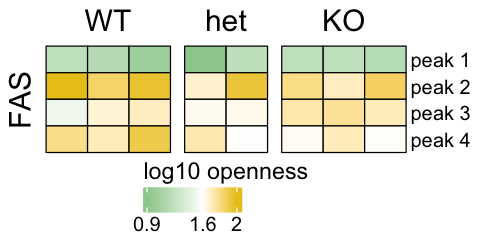

In [10]:
# heatmaps FAS
options(repr.plot.width = 4
        ,repr.plot.height = 2
               )
plot_heatmap("Ly1","FAS")

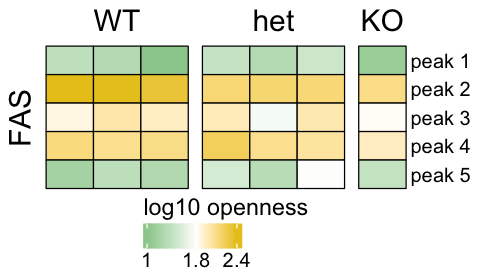

In [11]:
options(repr.plot.width = 4
        ,repr.plot.height = 2.3
               )
plot_heatmap("Ly8","FAS")

In [12]:
pdf("ATAC_FAS_Ly8.pdf"
   ,width = 4
   ,height = 2.3)
plot_heatmap("Ly8","FAS")
dev.off()

pdf 
  2

In [13]:
plot_heatmap_ETS1_RUNX3 <- function(cell_line){
    my_anno <- anno[[cell_line]]
    my_counts <- counts[[cell_line]]
    
    idx_peaks <- anno[[cell_line]]$SYMBOL %in% c("ETS1"
                                                ,"RUNX3")
    
    padj <- anno[[cell_line]]$padj[idx_peaks]
    print("padj")
    print(padj)
    
    peaks <- anno[[cell_line]]$peakID[idx_peaks]
    names(peaks) <- anno[[cell_line]]$SYMBOL[idx_peaks]
    
    samples <- sapply(colnames(my_counts)
                     ,function(my_sample){
                         ifelse(grepl("cas9"
                                     ,my_sample)
                               ,"WT"
                               ,ifelse(grepl("het"
                                            ,my_sample)
                                      ,"het"
                                      ,"KO"))
                     })
    names(samples) <- colnames(my_counts)
    
    samples <- factor(samples
                     ,levels = c("WT"
                                ,"het"
                                ,"KO"
                                )
                      ,ordered=TRUE
                     )
    samples <- samples[order(samples)]
    print(samples)
    
    my_counts <- as.matrix(my_counts[idx_peaks,names(samples)])
    colnames(my_counts) <- samples
    
     my_means <- matrix(nrow = nrow(my_counts)
                       ,ncol = ncol(my_counts)
                      ,rowMeans(my_counts)
                      )
    #print(my_means)
    my_counts <- my_counts - my_means
    
    my_max <- matrix(nrow = nrow(my_counts)
                       ,ncol = ncol(my_counts)
                      ,apply(my_counts
                              ,1
                              ,function(x)max(abs(x)))
                      )
    my_counts <- my_counts / my_max
    
    
    my_labels <- c(min(my_counts)
                   ,mean(my_counts)# 2#
                   ,max(my_counts)# 4#
                  )
    
    col_fun = colorRamp2(my_labels
                         ,c("darkseagreen3"#"white"#"gray90"
                           ,"white"#my_red#"gray20"
                           ,my_yellow#"darkred"#"black"#
                           )
                        )
    
    my_peaks <- peaks_FAS_RUNX3_ETS1[rownames(my_counts),]
    rownames(my_counts) <- my_peaks$label
    
    
    rowAnno  <-  rowAnnotation(rows = anno_text(rownames(my_counts)
                                               )
                               ,gap = unit(2, "mm")
                               
                              )
    
    h <- Heatmap(my_counts
                 ,right_annotation = rowAnno
                 ,heatmap_legend_param = list(title = "openness log10\ncentered counts"
                                              ,at = my_labels
                                              ,labels = round(my_labels
                                                         ,digits = 1)
                                              ,grid_width = unit(5, "mm")
                                              ,grid_height = unit(5, "mm")
                                              ,labels_gp = gpar(fontsize = 14)
                                              ,title_gp = gpar(fontsize = 16)
                                              ,title_padding = unit(2, "mm")
                                              ,direction = "horizontal"
                                             )
                 ,cluster_columns = FALSE#
                 ,show_column_dend = FALSE
                 ,show_column_names = FALSE
                 ,cluster_rows = FALSE
                 ,column_order = 1:ncol(my_counts)
                 ,column_split = samples
                 ,column_gap = unit(3, "mm")
                 ,column_title_gp = grid::gpar(fontsize = 22)
                 ,show_row_names = FALSE
                 ,row_split = names(peaks)
                 ,row_gap = unit(3, "mm")
                 ,row_title_gp = grid::gpar(fontsize = 22)
                 ,col = col_fun
                 ,rect_gp = gpar(col = "black", lwd = 1)
                )
        options(repr.plot.width = my_width
               ,repr.plot.height = 5
               )
    
    ht_opt(DIMNAME_PADDING = unit(5, "mm"))

        draw(h
             ,heatmap_legend_side = "bottom"
            )
    
}

[1] "padj"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1
Ly1_cas9_N1 Ly1_cas9_N7 Ly1_cas9_N9 Ly1_het_F10  Ly1_het_F9   Ly1_KO_E8 
         WT          WT          WT         het         het          KO 
  Ly1_KO_G1   Ly1_KO_H3 
         KO          KO 
Levels: WT < het < KO


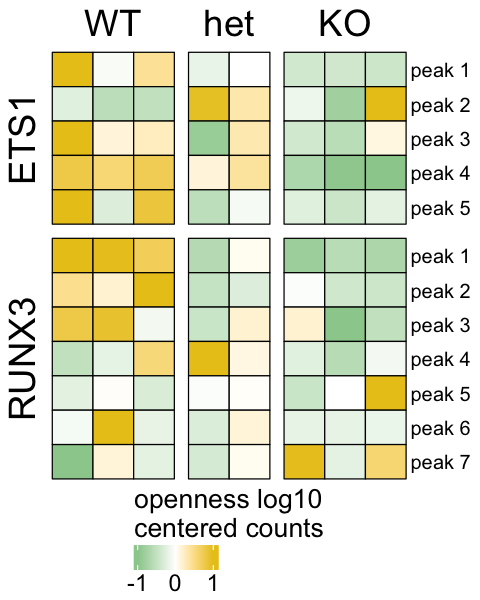

In [14]:
plot_heatmap_ETS1_RUNX3("Ly1")

In [15]:
pdf("ATAC_ETS1_RUNX3_Ly1.pdf"
   ,width = 4
   ,height = 5)
plot_heatmap_ETS1_RUNX3("Ly1")
dev.off()

[1] "padj"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1
Ly1_cas9_N1 Ly1_cas9_N7 Ly1_cas9_N9 Ly1_het_F10  Ly1_het_F9   Ly1_KO_E8 
         WT          WT          WT         het         het          KO 
  Ly1_KO_G1   Ly1_KO_H3 
         KO          KO 
Levels: WT < het < KO


pdf 
  2

[1] "padj"
 [1] 0.73478100 1.00000000 0.03303442 1.00000000 1.00000000 1.00000000
 [7] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
Ly8_cas9_N11  Ly8_cas9_N3  Ly8_cas9_N6   Ly8_het_A9  Ly8_het_G10   Ly8_het_G5 
          WT           WT           WT          het          het          het 
   Ly8_KO_G6 
          KO 
Levels: WT < het < KO


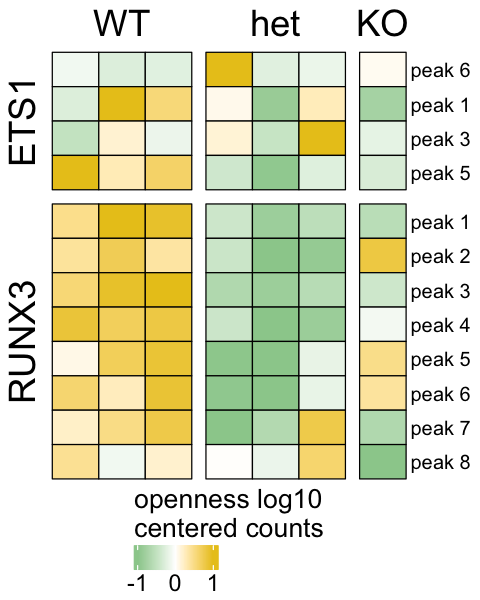

In [16]:
plot_heatmap_ETS1_RUNX3("Ly8")

In [17]:
pdf("ATAC_ETS1_RUNX3_Ly8.pdf"
   ,width = 4
   ,height = 5)
plot_heatmap_ETS1_RUNX3("Ly8")
dev.off()

[1] "padj"
 [1] 0.73478100 1.00000000 0.03303442 1.00000000 1.00000000 1.00000000
 [7] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
Ly8_cas9_N11  Ly8_cas9_N3  Ly8_cas9_N6   Ly8_het_A9  Ly8_het_G10   Ly8_het_G5 
          WT           WT           WT          het          het          het 
   Ly8_KO_G6 
          KO 
Levels: WT < het < KO


pdf 
  2

In [18]:
print(peaks_FAS_RUNX3_ETS1)

                                      peak_ID  label gene_symbol chromosome
10_88987113_88987194     10_88987113_88987194 peak 1         FAS         10
10_88990451_88990877     10_88990451_88990877 peak 2         FAS         10
10_88991303_88991478     10_88991303_88991478 peak 3         FAS         10
10_88991699_88992075     10_88991699_88992075 peak 4         FAS         10
10_89003524_89003668     10_89003524_89003668 peak 5         FAS         10
1_24924187_24924334       1_24924187_24924334 peak 1       RUNX3          1
1_24925271_24925361       1_24925271_24925361 peak 2       RUNX3          1
1_24929545_24929917       1_24929545_24929917 peak 3       RUNX3          1
1_24930223_24930669       1_24930223_24930669 peak 4       RUNX3          1
1_24932304_24932499       1_24932304_24932499 peak 5       RUNX3          1
1_24934451_24934598       1_24934451_24934598 peak 6       RUNX3          1
1_24963581_24963762       1_24963581_24963762 peak 7       RUNX3          1
1_24965366_2

In [19]:
## Summarizes data.
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [20]:
plot_boxplots <- function(cell_line,gene){
    my_anno <- anno[[cell_line]]
    my_counts <- counts[[cell_line]]
        
    
    
    idx_peaks <- my_anno$SYMBOL %in% gene
    
    padj <- my_anno$padj[idx_peaks]
    names(padj) <- peaks_FAS_RUNX3_ETS1[my_anno$peakID[idx_peaks],]$label
    print("padj")
    print(padj)
    
    my_counts <- my_counts[idx_peaks,]
    rownames(my_counts) <- peaks_FAS_RUNX3_ETS1[my_anno$peakID[idx_peaks],]$label
    
    #print(str(my_counts))
        
        
        df <- data.frame(peak = rep(rownames(my_counts)
                                    ,ncol(my_counts)
                                   )
                         ,samples = rep(colnames(my_counts)
                                       ,each = sum(idx_peaks)
                                       )
                         ,counts = unlist(lapply(colnames(my_counts), function(j) my_counts[,j]))
                         ,log10_counts = unlist(lapply(colnames(my_counts), function(j) log10(my_counts[,j]+1)))
                        )
        df$genotype_pooled <- sapply(df$samples, function(i) ifelse(grepl("cas9",i), "WT", "het + KO"))
        df$genotype <- sapply(df$samples, function(i) ifelse(grepl("cas9",i)
                                                             , "WT"
                                                             , ifelse(grepl("het"
                                                                            ,i)
                                                                      ,"het"
                                                                      ,"KO")))
                              
        tgc <- summarySE(df, measurevar="counts", groupvars=c("peak","genotype_pooled"))
        tgc$counts_minus_sd  <- tgc$counts - tgc$sd
        tgc$counts_minus_sd[tgc$counts_minus_sd<0]  <- 0 # to be able to show SD
        tgc$counts_plus_sd  <- tgc$counts + tgc$sd

        p <- ggplot()+
                geom_bar(data = tgc
                   ,aes(x = peak
                       ,y = counts
                        ,fill = genotype_pooled
                        
                       )
                         ,stat = "identity"
                        ,position=position_dodge(.8)
                        ,width = 0.6
                        ,alpha = 0.3
                        ,show.legend = FALSE)+
                geom_errorbar(data = tgc
                              ,aes(x = peak
                                   ,ymin=counts_minus_sd
                                   ,ymax=counts_plus_sd
                                   ,fill = genotype_pooled
                                  ),
                              size=.3,    # Thinner lines
                              width=.2,
                              position=position_dodge(.8)
                             ,color = "gray50")+
                geom_point(data = df[df$genotype == "WT",]
                           ,aes(x = peak
                               ,y = counts
                               )
                          ,color = "black"
                           ,show.legend = FALSE
                          ,position = position_nudge(x = -0.2)
                          ,alpha = 0.75
                          ,size = 2)+
                geom_point(data = df[df$genotype == "het",]
                           ,aes(x = peak
                               ,y = counts
                               )
                          ,color = "blue"
                           ,show.legend = FALSE
                          ,position = position_nudge(x = 0.2)
                          ,alpha = 0.75
                          ,size = 2)+
                geom_point(data = df[df$genotype == "KO",]
                           ,aes(x = peak
                               ,y = counts
                               )
                          ,color = "red"
                           ,show.legend = FALSE
                          ,position = position_nudge(x = 0.2)
                          ,alpha = 0.75
                          ,size = 2)+
                xlab("")+
                ylab("counts")+
                theme_bw()+
                scale_fill_manual(values = c("gray80"
                                             ,"gray80"))+
                scale_color_manual(values = c("WT" = "black"
                                              ,"het" = "blue"
                                              ,"KO" = "red"))+
                ggtitle(paste(cell_line
                             ,gene))+
                scale_y_continuous(trans='log10')
                                                
        print(p)
    
}

[1] "padj"
peak 1 peak 2 peak 3 peak 4 peak 5 
     1      1      1      1      1 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


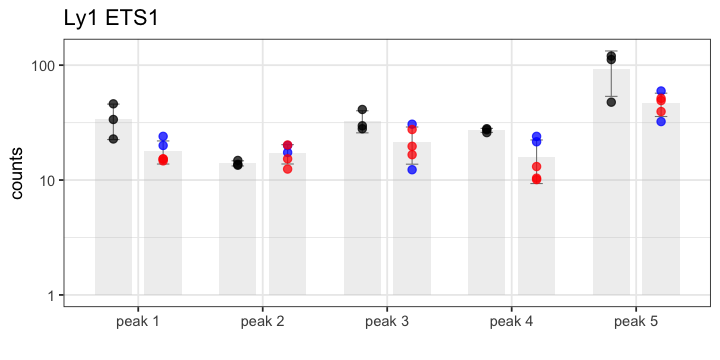

In [21]:
options(repr.plot.width = 6
               ,repr.plot.height = 3)  
plot_boxplots("Ly1","ETS1")

In [22]:
svg("ATAC_ETS1_Ly1_barplot.svg"
   ,width = 6
   ,height = 3)
plot_boxplots("Ly1","ETS1")
dev.off()

[1] "padj"
peak 1 peak 2 peak 3 peak 4 peak 5 
     1      1      1      1      1 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


pdf 
  2

[1] "padj"
peak 6 peak 1 peak 3 peak 5 
     1      1      1      1 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


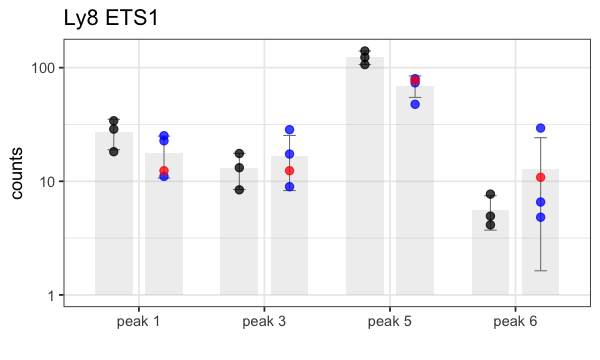

In [23]:
options(repr.plot.width = 5
               ,repr.plot.height = 3)  
plot_boxplots("Ly8","ETS1")

In [24]:
svg("ATAC_ETS1_Ly8_barplot.svg"
   ,width = 5
   ,height = 3)
plot_boxplots("Ly8","ETS1")
dev.off()

[1] "padj"
peak 6 peak 1 peak 3 peak 5 
     1      1      1      1 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


pdf 
  2

[1] "padj"
peak 1 peak 2 peak 3 peak 4 peak 5 peak 6 peak 7 
     1      1      1      1      1      1      1 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


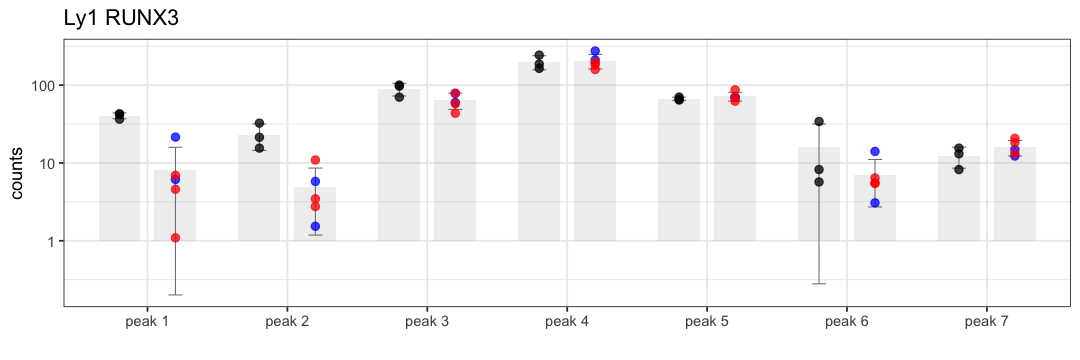

In [25]:
options(repr.plot.width = 9
               ,repr.plot.height = 3)  
plot_boxplots("Ly1","RUNX3")

In [26]:
svg("ATAC_RUNX3_Ly1_barplot.svg"
   ,width = 9
   ,height = 3)
plot_boxplots("Ly1","RUNX3")
dev.off()

[1] "padj"
peak 1 peak 2 peak 3 peak 4 peak 5 peak 6 peak 7 
     1      1      1      1      1      1      1 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”


pdf 
  2

[1] "padj"
    peak 1     peak 2     peak 3     peak 4     peak 5     peak 6     peak 7 
0.73478100 1.00000000 0.03303442 1.00000000 1.00000000 1.00000000 1.00000000 
    peak 8 
1.00000000 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


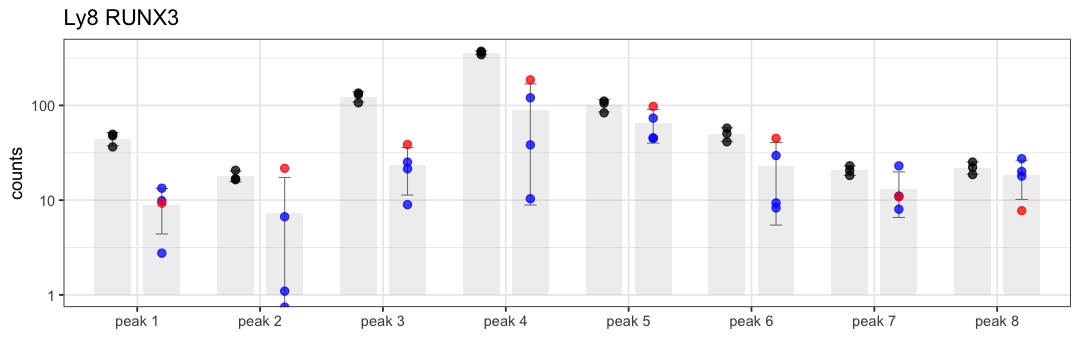

In [27]:
options(repr.plot.width = 9
               ,repr.plot.height = 3)  
plot_boxplots("Ly8","RUNX3")

In [28]:
svg("ATAC_RUNX3_Ly8_barplot.svg"
   ,width = 9
   ,height = 3)
plot_boxplots("Ly8","RUNX3")
dev.off()

[1] "padj"
    peak 1     peak 2     peak 3     peak 4     peak 5     peak 6     peak 7 
0.73478100 1.00000000 0.03303442 1.00000000 1.00000000 1.00000000 1.00000000 
    peak 8 
1.00000000 


Warning message in geom_errorbar(data = tgc, aes(x = peak, ymin = counts_minus_sd, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


pdf 
  2

# Export

In [29]:
write.table(peaks_FAS_RUNX3_ETS1
           ,file = "TableS2_peak_labels_FAS_RUNX3_ETS1.txt"
            ,col.names = TRUE
            ,row.names = FALSE
           )